# Importamos librerias

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join
from scipy.io import wavfile
from scipy.signal import fftconvolve
import IPython
import pyroomacoustics as pra
from IPython.display import Audio
from tqdm import tqdm
from scipy.io.wavfile import write


In [182]:
# Vamos a importar los archivos de audio
data_dir = '/home/felix/Project/data/Libri2Mix/wav16k/min/libri3mix_dev/mix_both'
# Creamos una lista con la ruta de los audios 
paths = [os.path.join(data_dir,f) for f in os.listdir(data_dir)]


In [183]:
fileNamesWav = [f.split('/')[10] for f in paths]
fileNames = [f.split('.')[0] for f in fileNamesWav]


In [184]:
# Reproducimos el audio
paths[0]
Audio(data = paths[0], rate = 16000)

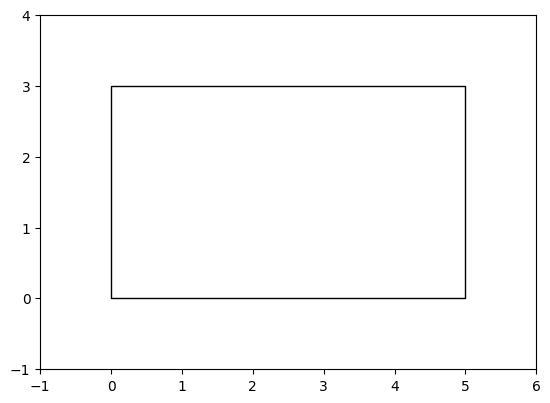

In [47]:
# Creamos una entorno 
corners = np.array([[0,0], [0,3], [5,3], [5,0], [3,0]]).T  # [x,y]
room = pra.Room.from_corners(corners)
fig, ax = room.plot()
ax.set_xlim([-1, 6])
ax.set_ylim([-1, 4]);

## Creamos base de datos

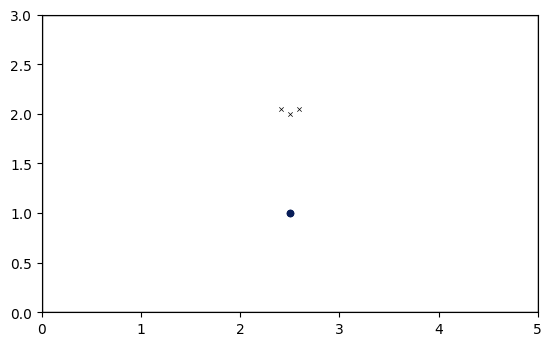

In [59]:
# specify signal source

fs, signal = wavfile.read(paths[0])

# add source to 2D room
room = pra.Room.from_corners(corners, fs=fs)
room.add_source([5/2.,1.], signal=signal)

h = (np.sqrt(0.3)*0.18)/2.

R = np.c_[
    [5./2.+(0.18/2.), 2.+h],# mic 1
    [5./2.-(0.18/2.), 2.+h ], # mic 2
    [5./2., 2.] # mic 3
    ]



room.add_microphone_array(pra.MicrophoneArray(R, room.fs))

fig, ax = room.plot()


In [158]:
room.simulate()
mic1 = room.mic_array.signals[0,:].astype(np.int16)
mic2 = room.mic_array.signals[1,:]
mic3 = room.mic_array.signals[2,:]

In [154]:
Audio(data = mic1, rate = room.fs)

In [143]:
mic1

array([1.63524403e-13, 1.63524403e-13, 8.17622013e-13, ...,
       3.06608255e-12, 3.90414511e-12, 0.00000000e+00])

In [81]:
from scipy.io.wavfile import write
import wavio as wv

In [187]:
parentDir = "/home/felix/Project/data/LibriMix_pyroom"
for audio in tqdm(range(len(paths))):
    # Cramos los directorios donde se van a guardar las grabaciones
    dirName = fileNames[audio]
    path = os.path.join(parentDir, dirName)
    os.mkdir(path)
  

     
    #Creamos los audios
    
    fs, signal = wavfile.read(paths[audio])

    # add source to 2D room
    room = pra.Room.from_corners(corners, fs=fs)
    room.add_source([5/2.,1.], signal=signal)

    h = (np.sqrt(0.3)*0.18)/2.

    R = np.c_[
    [5./2.+(0.18/2.), 2.+h],# mic 1
    [5./2.-(0.18/2.), 2.+h ], # mic 2
    [5./2., 2.] # mic 3
    ]

    room.add_microphone_array(pra.MicrophoneArray(R, room.fs))
    
    room.simulate()
    mic1 = room.mic_array.signals[0,:].astype(np.int16)
    mic2 = room.mic_array.signals[1,:].astype(np.int16)
    mic3 = room.mic_array.signals[2,:].astype(np.int16)
    
    write(path+"/mic1.wav", rate = room.fs, data = mic1) 
    write(path+"/mic2.wav", rate = room.fs, data = mic2) 
    write(path+"/mic3.wav", rate = room.fs, data = mic3) 
    

100%|███████████████████████████████████████| 1244/1244 [00:41<00:00, 29.93it/s]


In [186]:
Audio(data = paths[523], rate = room.fs)